<a href="https://colab.research.google.com/github/trankha1655/CS114_ML/blob/main/%C4%90%E1%BB%93%20%C3%A1n%20cu%E1%BB%91i%20k%E1%BB%B3/Colab_train/Dragon_fruit_classifier_after_mask_lessdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. chạy block "clone data" 
2. chạy block "lib"
3. chạy block "prepare- data"
4. chạy block "creat data-gen _ to classify"
5. chạy block "Model classify"
6. chạy block "train"

In [ ]:
!nvidia-smi

Fri Jul 16 01:57:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Utility Functions

In [ ]:
label3_path="/content/Dataset/label_3"

In [ ]:
temp = os.listdir("/content/Dataset/label_3/Binh_s cam")

In [ ]:
X3=[]
for x in temp:
   for cam in cams:
      X3.append(os.path.join(label3_path,cam,x))

In [ ]:
n=12
imgs= np.zeros((n,INPUT_SHAPE[0],INPUT_SHAPE[1],INPUT_SHAPE[2]))

In [ ]:
loader = A.Compose([
            A.Resize(width=640, height=320),
        ])

        

for i in range(n):
    img = load_img(X3[i], target_size=(299,299)) 
    img = img_to_array(img)
    clone= loader(image=img)["image"]
    #img = pp_vgg16(img)
    imgs[i] = clone



In [ ]:
ims=imgs.copy()

In [ ]:

def some_img_n_mask(testgen,count=4):
    print("len testgen {}".format(len(testgen)))
    batch= testgen[1]
    data= batch[:5]
    return data



In [ ]:
X,y= some_img_n_mask(testgen)

len testgen 9


In [ ]:
import time
now=time.time()
y_pre= model.predict(pp_vgg16(imgs))
then= time.time()
print(then-now-0.002)

0.4557317237854004


In [ ]:
y_pre[0]

In [ ]:
batch=[]
for i in range(len(imgs)):
    batch.append([ims[i]/255,y_pre[i][:,:,0]])

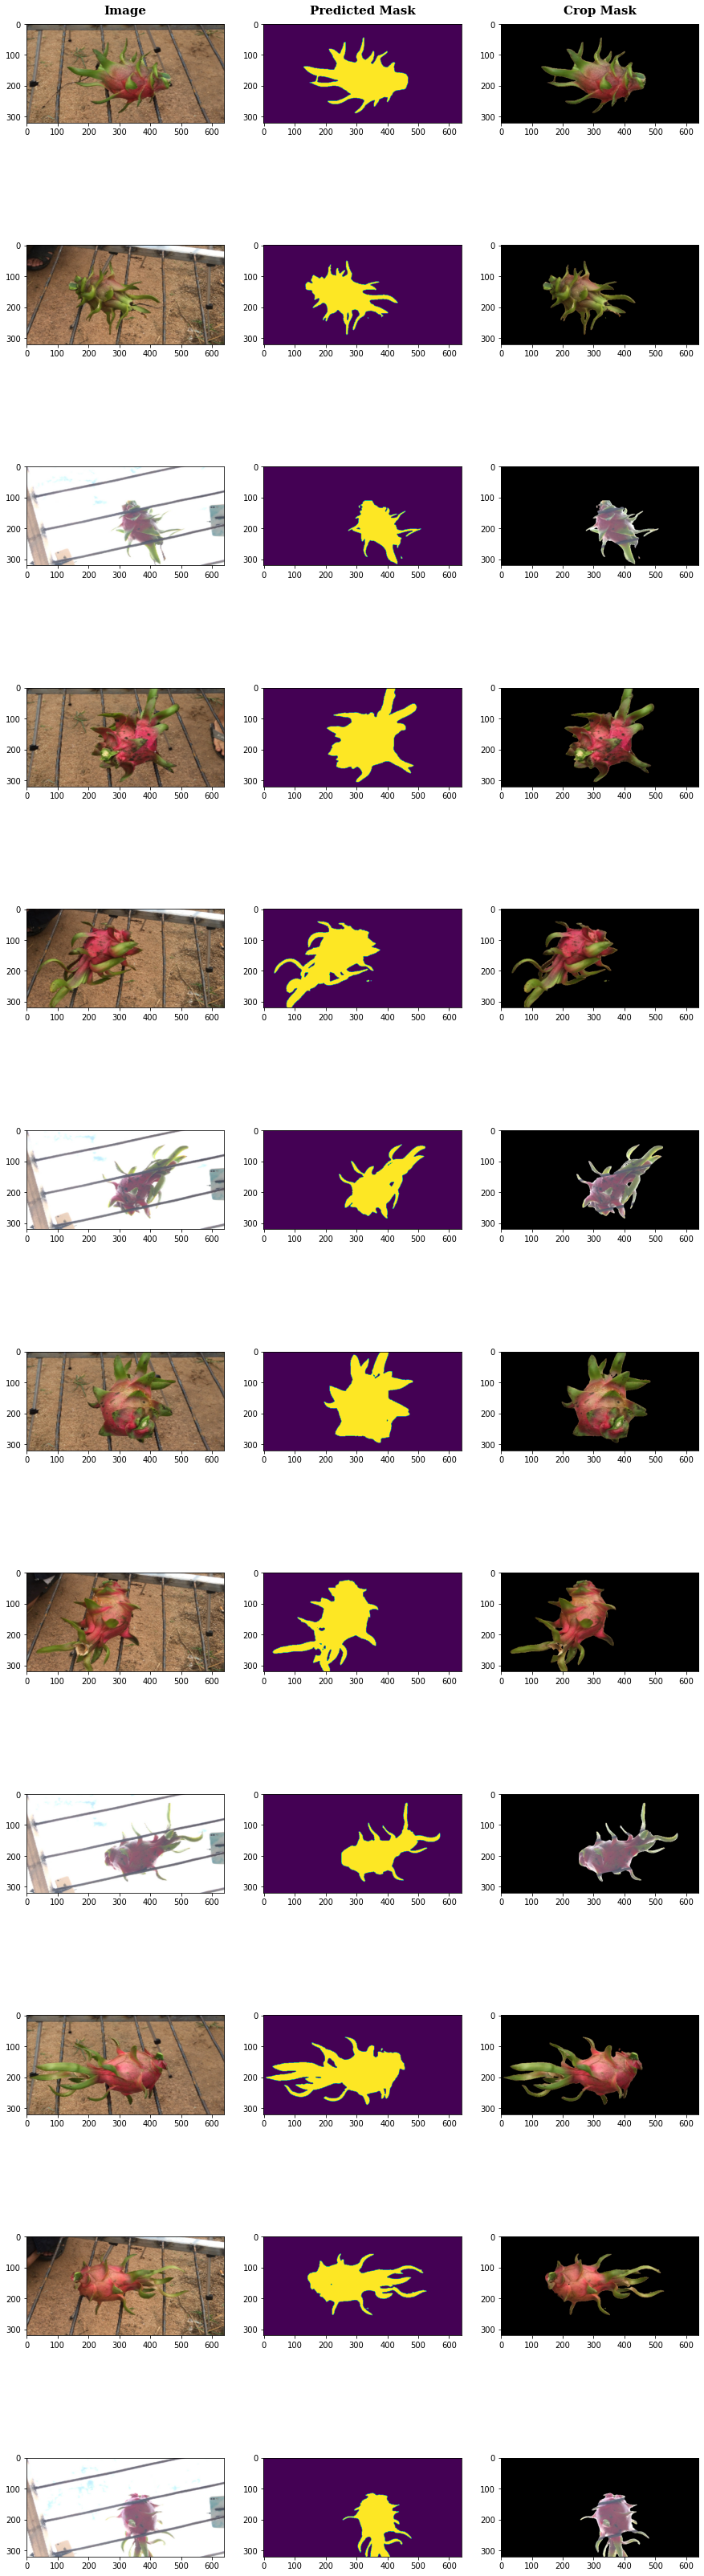

In [ ]:

fig, axes = plt.subplots(len(batch), 3, figsize=(3*5, len(batch) * 5))

for i in range(len(batch)):
    
            
    
    image, predicted_mask = batch[i][0], batch[i][1]
    binary_predicted_mask = np.where(predicted_mask > 0.5, 1, 0)
    fg= binary_predicted_mask.copy().astype(np.int8)
    
    fg = cv2.bitwise_or(image, image, mask=fg)
    
    image_ax, predicted_mask_ax ,fg_ax = axes[i, 0], axes[i, 1], axes[i, 2]
    
    image_ax.imshow(image)
    
    predicted_mask_ax.imshow(binary_predicted_mask)
    fg_ax.imshow(fg)
    
    
    if i == 0:
        image_ax.set_title("Image", fontsize=15, fontweight="bold", fontfamily="serif", y=1.05)
        
        predicted_mask_ax.set_title("Predicted Mask", fontsize=15, fontweight="bold", fontfamily="serif", y=1.05)
        fg_ax.set_title("Crop Mask", fontsize=15, fontweight="bold", fontfamily="serif", y=1.05)
        
        
fig.show()

In [ ]:
test_dir="/content/tl1-1200x676.jpg"

In [ ]:
img = load_img(test_dir, target_size=INPUT_SHAPE[:2]) 
img = img_to_array(img)
img = preprocess_input(img)
batch= np.zeros((1,INPUT_SHAPE[0],INPUT_SHAPE[1],INPUT_SHAPE[2]))
batch[0]= img

In [ ]:
y_t= model.predict(batch)

In [ ]:
print(img)

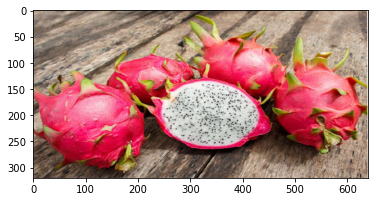

In [ ]:
plt.imshow(img/255)
plt.show()

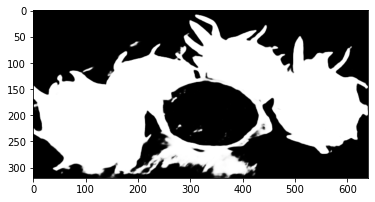

In [ ]:
plt.imshow(y_t[0][:,:,0],'gray')

In [ ]:
model.evaluate_generator(testgen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.056663643568754196, 0.961049497127533]

In [ ]:


out= model.output_mask

In [ ]:
temp= Model(inputs=Input(INPUT_SHAPE),outputs=out)

ValueError: ignored

In [ ]:
import time
now=time.time()
y_pre= model.predict(X)
then= time.time()
print(then-now-0.002)

0.6954837779998779


In [ ]:
#vgg16 backbone
model.evaluate_generator(testgen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.05981047824025154, 0.9590575695037842]

In [ ]:
model.save_weights("unet_bg_vgg.h5")

In [ ]:
model.save("unet_vgg_model")

INFO:tensorflow:Assets written to: unet_vgg_model/assets


In [ ]:
resnet1.evaluate_generator(valgen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.8449256420135498, 0.5820895433425903]

In [ ]:
import matplotlib.pyplot as plt
hist= hist_model
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Nháp :)

In [ ]:
path = "/content/Dataset/{}label_1/Binh_s cam/Binh_cam.00_03_56_02.Still006.{}"   

path2="/content/Dataset/{}label_2/Binh_s cam/label_2.01_13_23_06.Still000.{}"

In [ ]:
data["shapes"][-1]["points"]

In [ ]:
def norm(img):
    MEAN = 255 * torch.tensor([0.485, 0.456, 0.406])
    STD = 255 * torch.tensor([0.229, 0.224, 0.225])

    x = torch.from_numpy(np.array(img))
    x = x.type(torch.float32)
    x = x.permute(-1, 0, 1)
    x = (x - MEAN[:, None, None]) / STD[:, None, None]
    img = np.array(x).transpose(1, 2, 0)
    plt.imshow(np.array(x).transpose(1, 2, 0))
    plt.show()
    return img

[WARNING] shape:labelme_shapes_to_label:80 - labelme_shapes_to_label is deprecated, so please use shapes_to_label.


(720, 1280)


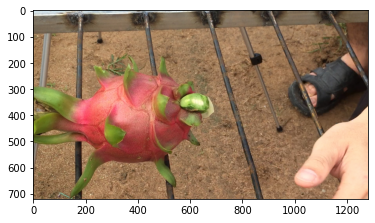

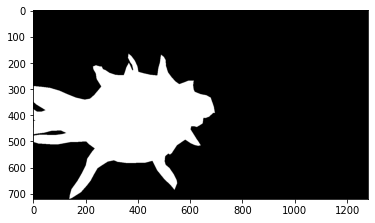

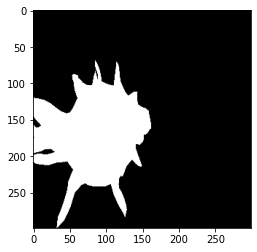

array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [  0.      ,   0.      ,   0.      , ..., 255.      , 255.      ,
        255.      ],
       [125.795746, 125.795746, 255.      , ..., 255.      , 255.      ,
        255.      ],
       [255.      , 255.      , 255.      , ..., 255.      , 255.      ,
        255.      ]], dtype=float32)

In [ ]:
def get_mask(path):
    
        
    img = Image.open(path.format("","jpg")).convert('RGB')
    data = json.load(open(path.format("json/","json")))
    

    #mask = Image.open(mask_path).convert('L') # Use mask.mode to know that the format of the read mask image is I, which is 32-bit integer data, so it must be converted to L format
    # Change to read directly from json file
    mask, label_names = shape.labelme_shapes_to_label((720,1280), data['shapes'])
    print(mask.shape)
    obj_ids = np.unique(mask)  # Remove duplicate numbers in the array and sort
    obj_ids = obj_ids[1:]  # Remove the first index because it is the background
    masks = mask == obj_ids[:, None, None]  # split the color-encoded mask into a set of binary masks

    mask= mask.astype("float32")

    #mask= np.resize(mask,(299,299))
    
    plt.imshow(img)
    plt.show()

    loader = A.Compose([
            A.Resize(width=299, height=299),
        ])
    clone = mask.copy()
    #image = np.array(Image.open(path).convert("L"))

    clone = loader(image=clone)["image"]

    clone=255*clone

    ret, thresh1 = cv2.threshold(clone, 120, 255, cv2.THRESH_BINARY)


    plt.imshow(mask,"gray")
    plt.show()

    plt.imshow(thresh1,"gray")
    plt.show()
    
    
    
    #clone = clone.resize(299,299)

    #plt.imshow(clone)
    #plt.show()

    return thresh1
    
get_mask(path)[50:200,0:130]

# Lib

In [ ]:
import matplotlib.pyplot as plt
from imutils import paths

from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array, array_to_img, load_img

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from keras.layers.merge import add
import numpy as np
import random
import os
import json
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import torch

import tensorflow as tf
import albumentations as A
from keras.utils.vis_utils import plot_model


In [ ]:
from tensorflow.keras.layers import  Maximum,Reshape,Concatenate,Input,Dropout,Conv2D , Flatten , Dense , MaxPool2D , BatchNormalization , GlobalAveragePooling2D
from tensorflow.keras.applications.inception_resnet_v2 import  decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.layers.merge import concatenate
from tensorflow.keras.utils import Sequence




In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2 
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as pp_input_resnet2

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50 
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_resnet50

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 , preprocess_input as pp_mb

#Data

## I clone data

In [ ]:
!apt install subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 subversion
0 upgraded, 5 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,237 kB of archives.
After this operation, 9,910 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libapr1 amd64 1.6.3-2 [90.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libaprutil1 amd64 1.6.1-2 [84.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libserf-1-1 amd64 1.3.9-6 [44.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libsvn1 amd64 1.9.7-4ubuntu1 [1,183 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 subversion amd64 1.9.7-4ubuntu1 

In [ ]:
!svn checkout https://github.com/trankha1655/CS114_ML/trunk/Dataset/csv

A    csv/test.csv
A    csv/train.csv
A    csv/val.csv
Checked out revision 114.


In [ ]:
!svn checkout https://github.com/trankha1655/CS114_ML/trunk/Dataset/crop_mask

A    crop_mask/label_1
A    crop_mask/label_1/Binh_s cam
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_03_50_20.Still004.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_03_54_01.Still005.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_03_56_02.Still006.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_03_58_02.Still007.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_04_04_01.Still008.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_04_07_02.Still009.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_04_09_15.Still010.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_04_12_13.Still011.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_04_18_14.Still012.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_04_21_01.Still013.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_04_23_28.Still014.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_04_29_15.Still015.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_04_33_10.Still016.png
A    crop_mask/label_1/Binh_s cam/Binh_cam.00_04_33_24.Stil

## II Prepare- data

### Datagen function

In [ ]:
class ProteinDataGenerator(Sequence):
            
    def __init__(self,
                 paths,
                 labels,
                 shape,
                 dir ,
                 batch_size=32,
                 shuffle = False,
                 cams='',
                 preprocess_input=None,
                 tail='png'):
      
        self.paths, self.labels = paths, labels
        self.batch_size = batch_size
        self.shape = shape
        self.shuffle = shuffle
        
        self.cams= cams
        self.dir= dir #"/content/crop_mask" 
        self.preprocess_input = preprocess_input
        self.tail = tail
        self.on_epoch_end()      

    
    def __len__(self):
        return int(np.ceil(len(self.paths) / float(self.batch_size)))
    
    def __getitem__(self, idx):

        

          #list index for generate
          indexes = self.indexes[idx * self.batch_size : (idx+1) * self.batch_size]

          #list path, label with its indexs
          paths = self.paths[indexes]
          y = self.labels[indexes]

          # create X for generate
          X = np.zeros((paths.shape[0],3, self.shape[0], self.shape[1], self.shape[2]))
         
          
          # Generate data
          
          for i, path in enumerate(paths):
              image = self.__load_image(path[:-3]+self.tail,self.labels[indexes[i]])
              X[i][0], X[i][1], X[i][2] = image[0], image[1], image[2]

          self.preprocess_input( X[:,0,])
          self.preprocess_input(X[:,1,])
          self.preprocess_input(X[:,2,])

          
          le = LabelEncoder()
          labels = le.fit_transform(y)
          # One-hot encoding
          lb = LabelBinarizer()
          labels = lb.fit_transform(labels)
          #print(labels.shape)
          
          return X, labels

       
    


    def on_epoch_end(self):
        
        # Updates indexes after each epoch
        self.indexes = np.arange(len(self.paths))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __iter__(self):
        """Create a generator that iterate over the Sequence."""
        for item in (self[i] for i in range(len(self))):
            yield item
            
    def __load_image(self, path,label=None):
        
          if "{}" not in path:
              full_path= os.path.join(self.dir,label,"{}",path)
          else:
              full_path= os.path.join(self.dir,path)

          x= []
          for cam in self.cams: 
              
              #img = self.img_crop_mask(full_path.format("",cam))

              img = load_img(full_path.format(cam), target_size=self.shape[:2])
              img = img_to_array(img)

              # Add one more dimension
              img = np.expand_dims(img, axis=0)
              # preprocess the images using preprocess_input() from inception module
              #img=self.preprocess_input(img)

              x.append(img)

          return x
    
  
        

        



### Read by csv

In [ ]:
#______ test
df = pd.read_csv("/content/csv/test.csv")

temp =  list(  zip( df['path'].to_list() ,  df['label'].to_list() )   ) 
random.shuffle(    temp)     
a, b = zip(*temp )
X_test,y_test = np.array(a), np.array(b)



#_______ train
df = pd.read_csv("/content/csv/train.csv")

temp =  list(  zip( df['path'].to_list() ,  df['label'].to_list() )   ) 
random.shuffle(    temp)     
a, b = zip(*temp )
X_train, y_train = np.array(a), np.array(b)


#______

df = pd.read_csv("/content/csv/val.csv")

temp =  list(  zip( df['path'].to_list() ,  df['label'].to_list() )   ) 
random.shuffle(    temp)     
a, b = zip(*temp)
X_val, y_val= np.array(a), np.array(b)

#_________
cams = ['Binh_s cam',  'Kha_s cam','Ti_s cam']
path="/content/crop_mask"

#### Read by folder

In [ ]:
def getPaths(path): 
    
    dir_label= os.listdir(path)
    

    ex2=[]
    for x in dir_label:
      if 'label' in x:
        ex2.append(x)

    dir_label= ex2

    dir_cams = ['Binh_s cam',  'Kha_s cam','Ti_s cam']

    

    cam= dir_cams[0]
    X_dir=[]
    y_label=[]
    for label in dir_label:
        if '.' not in label:
            dir_img = os.listdir(os.path.join(path,label,cam))
            final=[]
            for x in dir_img:
              if "Still" in x:
                final.append(x)
            categ   = [label] * len(final)
            X_dir+= final
            y_label+=(categ)

    #le = LabelEncoder()
    #labels = le.fit_transform(y_label)
    # One-hot encoding/
    


    return np.array(X_dir), np.array(y_label)



In [ ]:
"""

cams = ['Binh_s cam',  'Kha_s cam','Ti_s cam']

path="/content/crop_mask"
X,y = getPaths(path)
dir_label= [x for x in os.listdir(path) if "label" in x]
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.1)
X_train, X_val, y_train, y_val =train_test_split(X_train,y_train,test_size=0.22)

"""

'\n\ncams = [\'Binh_s cam\',  \'Kha_s cam\',\'Ti_s cam\']\n\npath="/content/crop_mask"\nX,y = getPaths(path)\ndir_label= [x for x in os.listdir(path) if "label" in x]\nX_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.1)\nX_train, X_val, y_train, y_val =train_test_split(X_train,y_train,test_size=0.22)\n\n'

In [ ]:
print(len(X_train))
print(len(X_val))
print(len(X_test))
print(len(y_train))
print(len(y_val))
print(len(y_test))

606
167
85
606
167
85


In [ ]:
cams

['Binh_s cam', 'Kha_s cam', 'Ti_s cam']

## III creat data-gen _ to classify

In [ ]:
INPUT_SHAPE = (299,299,3)

In [ ]:
traingen= ProteinDataGenerator(X_train,y_train,
                              INPUT_SHAPE,dir=path,batch_size=16,
                              shuffle=True,cams=cams,
                              preprocess_input=pp_input_resnet2)

In [ ]:
valgen= ProteinDataGenerator(X_val,y_val,
                              INPUT_SHAPE,path,
                              shuffle=True,cams=cams,batch_size=16,
                              preprocess_input=pp_input_resnet2)

In [ ]:
testgen =ProteinDataGenerator(X_test,y_test,
                              INPUT_SHAPE,path,
                              shuffle=True,cams=cams,batch_size=16,
                              preprocess_input=pp_input_resnet2)

**model for segment**

# Inception Resnet v2

### Model classify 3 x inception resnet 

In [ ]:
def get_model():

    def base_model():

        base_model = InceptionResNetV2(include_top= False , weights='imagenet')

        for x in base_model.layers:
            x.trainable =False


        z = base_model.output
        z = GlobalAveragePooling2D()(z)
        z = BatchNormalization()(z)
        z = Dense(1024, activation='relu')(z)
        z = Dropout(0.5)(z)
        z = BatchNormalization()(z)
        z = Dense(1024, activation='relu')(z)
        z = Dropout(0.5)(z)
        z = Dense(3, activation="softmax")(z)

        model= Model(inputs=base_model.input,outputs=z)
        model.load_weights("/content/drive/MyDrive/model_h5/1side_incepres_ep2_2_0.82.h5")
        
        for x in base_model.layers:
            x.trainable =False

        base= Model(model.input,model.layers[-7].output)

        return base


    def FC_model():
        inputs = Input(shape=(3,299,299,3))
        model = base_model()
        
        
        
        y1 = model(inputs[:,0,])
        y2 = model(inputs[:,1,])
        y3 = model(inputs[:,2,])

        combined = Concatenate()([y1, y2, y3])

        output = Dense(1024, activation="relu")(combined)
        output = BatchNormalization()(output)
        output = Dropout(0.5)(output)
        output = Dense(256, activation="relu")(output)
        output = BatchNormalization()(output)
        output = Dense(3, activation='softmax')(output)
        ensemble_model = Model(inputs=inputs, outputs=output)

        return ensemble_model

    final = FC_model()
    return final





In [ ]:
resnet1 = get_model()
resnet1.summary()

219062272/219055592 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 299, 299, 0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 299, 299, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 299, 299, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_2 (Sli (None, 299, 299, 3)  0           input_1[0][0]                    
_________________________

In [ ]:


resnet1.compile(optimizer= 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])


### train_inception resnet - fine tuning

In [ ]:

max=2
n=35
for i in range(n):
    print("epoch {}/{}".format(i+1,n))
    
    train = resnet1.fit(
        traingen,
        steps_per_epoch=len(traingen),
        epochs=1,
        validation_data=valgen,
        verbose=1,
        )
    
    
    vloss, vaccu= train.history["val_loss"][0] ,train.history["val_accuracy"][0]
    if vloss < max:
        max = vloss
        resnet1.save_weights("1side_incepres_ep2_{}_{}.h5".format( i, str(vaccu)[   :min(4,   len(str(vaccu))   )  ]  )   )     
        print("val_loss improve from {} => save epoch_{}".format(max,i))
    else:
        print("val_loss did not improve from {}".format(max))
    print()
  

epoch 1/35
38/38 [==============================] - 99s 1s/step - loss: 1.4900 - accuracy: 0.5050 - val_loss: 1.9392 - val_accuracy: 0.5749
val_loss improve from 1.939182996749878 => save epoch_0

epoch 2/35
38/38 [==============================] - 27s 703ms/step - loss: 0.8618 - accuracy: 0.6469 - val_loss: 1.6032 - val_accuracy: 0.5988
val_loss improve from 1.6032004356384277 => save epoch_1

epoch 3/35
38/38 [==============================] - 27s 708ms/step - loss: 0.6156 - accuracy: 0.7475 - val_loss: 1.1239 - val_accuracy: 0.5928
val_loss improve from 1.1238874197006226 => save epoch_2

epoch 4/35
38/38 [==============================] - 26s 691ms/step - loss: 0.4114 - accuracy: 0.8284 - val_loss: 1.3473 - val_accuracy: 0.6228
val_loss did not improve from 1.1238874197006226

epoch 5/35
38/38 [==============================] - 27s 717ms/step - loss: 0.6072 - accuracy: 0.8152 - val_loss: 1.2710 - val_accuracy: 0.6168
val_loss did not improve from 1.1238874197006226

epoch 6/35
38/3

In [ ]:
resnet1.evaluate(testgen)

6/6 [==============================] - 4s 719ms/step - loss: 2.6258 - accuracy: 0.4706


[2.625782012939453, 0.47058823704719543]

In [ ]:
#model.load_weights("/content/resnet50_epoch_5_0.40.h5")

In [ ]:
resnet1.evaluate(testgen)

5/5 [==============================] - 1s 189ms/step - loss: 1.7650 - accuracy: 0.6269


[1.7649625539779663, 0.6268656849861145]

###**Train All**

In [ ]:

for x in resnet1.layers[4].layers:
       x.trainable =True

resnet1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 299, 299, 0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 299, 299, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 299, 299, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_2 (Sli (None, 299, 299, 3)  0           input_1[0][0]                    
____________________________________________________________________________________________

In [ ]:

max+=0.2
n=100
for i in range(n):
    print("epoch {}/{}".format(i+1,n))
    
    train = resnet1.fit(
        traingen,
        steps_per_epoch=len(traingen),
        epochs=1,
        validation_data=valgen,
        verbose=1,
        )
    
    
    vloss, vaccu= train.history["val_loss"][0] ,train.history["val_accuracy"][0]
    if vloss < max:
        max = vloss
        resnet1.save_weights("1side_incepres_ep2_{}_{}.h5".format( i, str(vaccu)[   :min(4,   len(str(vaccu))   )  ]  )   )     
        print("val_loss improve from {} => save epoch_{}".format(max,i))
    else:
        print("val_loss did not improve from {}".format(max))
    print()
  

epoch 1/100
38/38 [==============================] - 27s 710ms/step - loss: 0.0956 - accuracy: 0.9686 - val_loss: 1.8728 - val_accuracy: 0.6647
val_loss did not improve from 1.2541235208511352

epoch 2/100
38/38 [==============================] - 26s 692ms/step - loss: 0.1093 - accuracy: 0.9670 - val_loss: 1.5607 - val_accuracy: 0.6766
val_loss did not improve from 1.2541235208511352

epoch 3/100
38/38 [==============================] - 27s 696ms/step - loss: 0.0642 - accuracy: 0.9752 - val_loss: 1.4193 - val_accuracy: 0.6647
val_loss did not improve from 1.2541235208511352

epoch 4/100
38/38 [==============================] - 27s 716ms/step - loss: 0.0736 - accuracy: 0.9719 - val_loss: 1.7184 - val_accuracy: 0.6467
val_loss did not improve from 1.2541235208511352

epoch 5/100
38/38 [==============================] - 26s 688ms/step - loss: 0.2077 - accuracy: 0.9587 - val_loss: 1.7089 - val_accuracy: 0.6467
val_loss did not improve from 1.2541235208511352

epoch 6/100
38/38 [===========

# ResNet50

### Model resnet50

In [ ]:
def base_model():

    base_model = ResNet50(include_top= False , weights='imagenet')

    z = base_model.output
    z = GlobalAveragePooling2D()(z)
    z = BatchNormalization()(z)
    
    model= Model(inputs=base_model.input,outputs=z)
    return model
    
def FC_model():
    inputs = Input(shape=(3,INPUT_SHAPE[0],INPUT_SHAPE[1],INPUT_SHAPE[2]))
    model = base_model()
    model1 = base_model()
    model2 = base_model()
    
    
    y1 = model(inputs[:,0,])
    y2 = model1(inputs[:,1,])
    y3 = model2(inputs[:,2,])

    combined = Maximum()([y1, y2, y3])
    output = Dropout(0.5)(combined)

    output = Dense(2024, activation="relu")(output)
    output = BatchNormalization()(output)
    output = Dropout(0.5)(output)

    output = Dense(2024, activation="relu")(output)
    output = BatchNormalization()(output)

    output = Dense(3, activation='softmax')(output)
    ensemble_model = Model(inputs=inputs, outputs=output)

    return ensemble_model

model = FC_model()

In [ ]:
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer= 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
for i in range(4,7):
    for x in model.layers[i].layers[:-2]:
       x.trainable =False

model.summary()

In [ ]:
model.summary()

### Fine tuning train_res50

In [ ]:
print(train.history['loss'])

[3.5585691928863525]


In [ ]:
train = model.fit_generator(
      traingen,
      steps_per_epoch=len(traingen),
      validation_data=valgen,
      validation_steps=8,
      epochs=1,
      
      verbose=1,
      )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


30/30 [==============================] - 73s 792ms/step - loss: 3.5586 - accuracy: 0.4494 - val_loss: 6744868.0000 - val_accuracy: 0.3359


In [ ]:
str(vaccu)[:min(4,len(str(vaccu)))]

'0.73'

In [ ]:
max=2
for i in range(14,40):
  print("epoch {}/{}".format(i,40))
  
  train = model.fit(
      traingen,
      steps_per_epoch=len(traingen),
      epochs=1,
      
      verbose=1,
      )
  
  print("_______val_evaluate")
  vloss, vaccu= model.evaluate(valgen)
  if vloss < max:
      max = vloss
      model.save_weights("resnet50_epoch_{}_{}.h5".format( i, str(vaccu)[   :min(4,   len(str(vaccu))   )  ]  )   )     
      print("val_loss improve from {} => save epoch_{}".format(max,i))
  else:
      print("val_loss did not improve from {}".format(max))
  print()
  

epoch 14/40
30/30 [==============================] - 18s 579ms/step - loss: 0.9619 - accuracy: 0.7532
_______val_evaluate
9/9 [==============================] - 2s 240ms/step - loss: 3349.9128 - accuracy: 0.2687
val_loss did not improve from 2

epoch 15/40
30/30 [==============================] - 17s 562ms/step - loss: 0.7091 - accuracy: 0.7595
_______val_evaluate
9/9 [==============================] - 2s 246ms/step - loss: 2199.4543 - accuracy: 0.3358
val_loss did not improve from 2

epoch 16/40
30/30 [==============================] - 17s 553ms/step - loss: 0.6305 - accuracy: 0.7932
_______val_evaluate
9/9 [==============================] - 2s 250ms/step - loss: 3501.5549 - accuracy: 0.3731
val_loss did not improve from 2

epoch 17/40
30/30 [==============================] - 17s 554ms/step - loss: 0.5545 - accuracy: 0.8059
_______val_evaluate
9/9 [==============================] - 2s 252ms/step - loss: 7413.9775 - accuracy: 0.2910
val_loss did not improve from 2

epoch 18/40
30/30 [=

### Train All

In [ ]:
for i in range(4,7):
    for x in model.layers[i].layers[:-2]:
       x.trainable =True

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 224, 224, 0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_2 (Sli (None, 224, 224, 3)  0           input_1[0][0]                    
____________________________________________________________________________________________

In [ ]:

for i in range(30):
  print("epoch {}/{}".format(i,30))
  
  train = model.fit(
      traingen,
      steps_per_epoch=len(traingen),
      epochs=1,
      
      verbose=1,
      )
  
  print("_______val_evaluate")
  vloss, vaccu= model.evaluate(valgen)
  if vloss < max:
      max = vloss
      model.save_weights("resnet50_epoch_{}_{}.h5".format(i,str(vaccu)[:4]))
      print("val_loss improve from {} => save epoch_{}".format(max,i))
  else:
      print("val_loss did not improve from {}".format(vloss))
  print()
  

epoch 0/30
30/30 [==============================] - 17s 557ms/step - loss: 0.3484 - accuracy: 0.8565
_______val_evaluate
9/9 [==============================] - 2s 247ms/step - loss: 1.0430 - accuracy: 0.7090
val_loss improve from 1.043022632598877 => save epoch_0

epoch 1/30
30/30 [==============================] - 17s 571ms/step - loss: 0.3157 - accuracy: 0.8797
_______val_evaluate
9/9 [==============================] - 2s 254ms/step - loss: 1.5733 - accuracy: 0.5522
val_loss did not improve from 1.573345422744751

epoch 2/30
30/30 [==============================] - 17s 558ms/step - loss: 0.3111 - accuracy: 0.8903
_______val_evaluate
9/9 [==============================] - 2s 249ms/step - loss: 3.2476 - accuracy: 0.3284
val_loss did not improve from 3.2476131916046143

epoch 3/30
30/30 [==============================] - 17s 554ms/step - loss: 0.9154 - accuracy: 0.6435
_______val_evaluate
9/9 [==============================] - 2s 252ms/step - loss: 383.8771 - accuracy: 0.3358
val_loss d

# MobileNetv2

### Model MobileNet v2

In [ ]:
def base_model():

    base_model = MobileNetV2(include_top= False , weights='imagenet')

    for x in base_model.layers:
        x.trainable =False

    z = base_model.output
    z = GlobalAveragePooling2D()(z)
    z = BatchNormalization()(z)
    z = Dense(1024, activation='relu')(z)
    z = Dropout(0.5)(z)
    model= Model(inputs=base_model.input,outputs=z)
    return model
    
def FC_model():
    inputs = Input(shape=(3,INPUT_SHAPE[0],INPUT_SHAPE[1],INPUT_SHAPE[2]))
    model = base_model()
    model1 = base_model()
    model2 = base_model()
    
    
    y1 = model(inputs[:,0,])
    y2 = model1(inputs[:,1,])
    y3 = model2(inputs[:,2,])

    combined = Concatenate()([y1, y2, y3])
    #output = Dropout(0.5)(combined)

    output = Dense(1024, activation="relu")(combined)
    output = BatchNormalization()(output)
    output = Dropout(0.5)(output)

    output = Dense(1024, activation="relu")(output)
    output = BatchNormalization()(output)

    output = Dense(3, activation='softmax')(output)
    ensemble_model = Model(inputs=inputs, outputs=output)

    return ensemble_model

model = FC_model()

9412608/9406464 [==============================] - 0s 0us/step


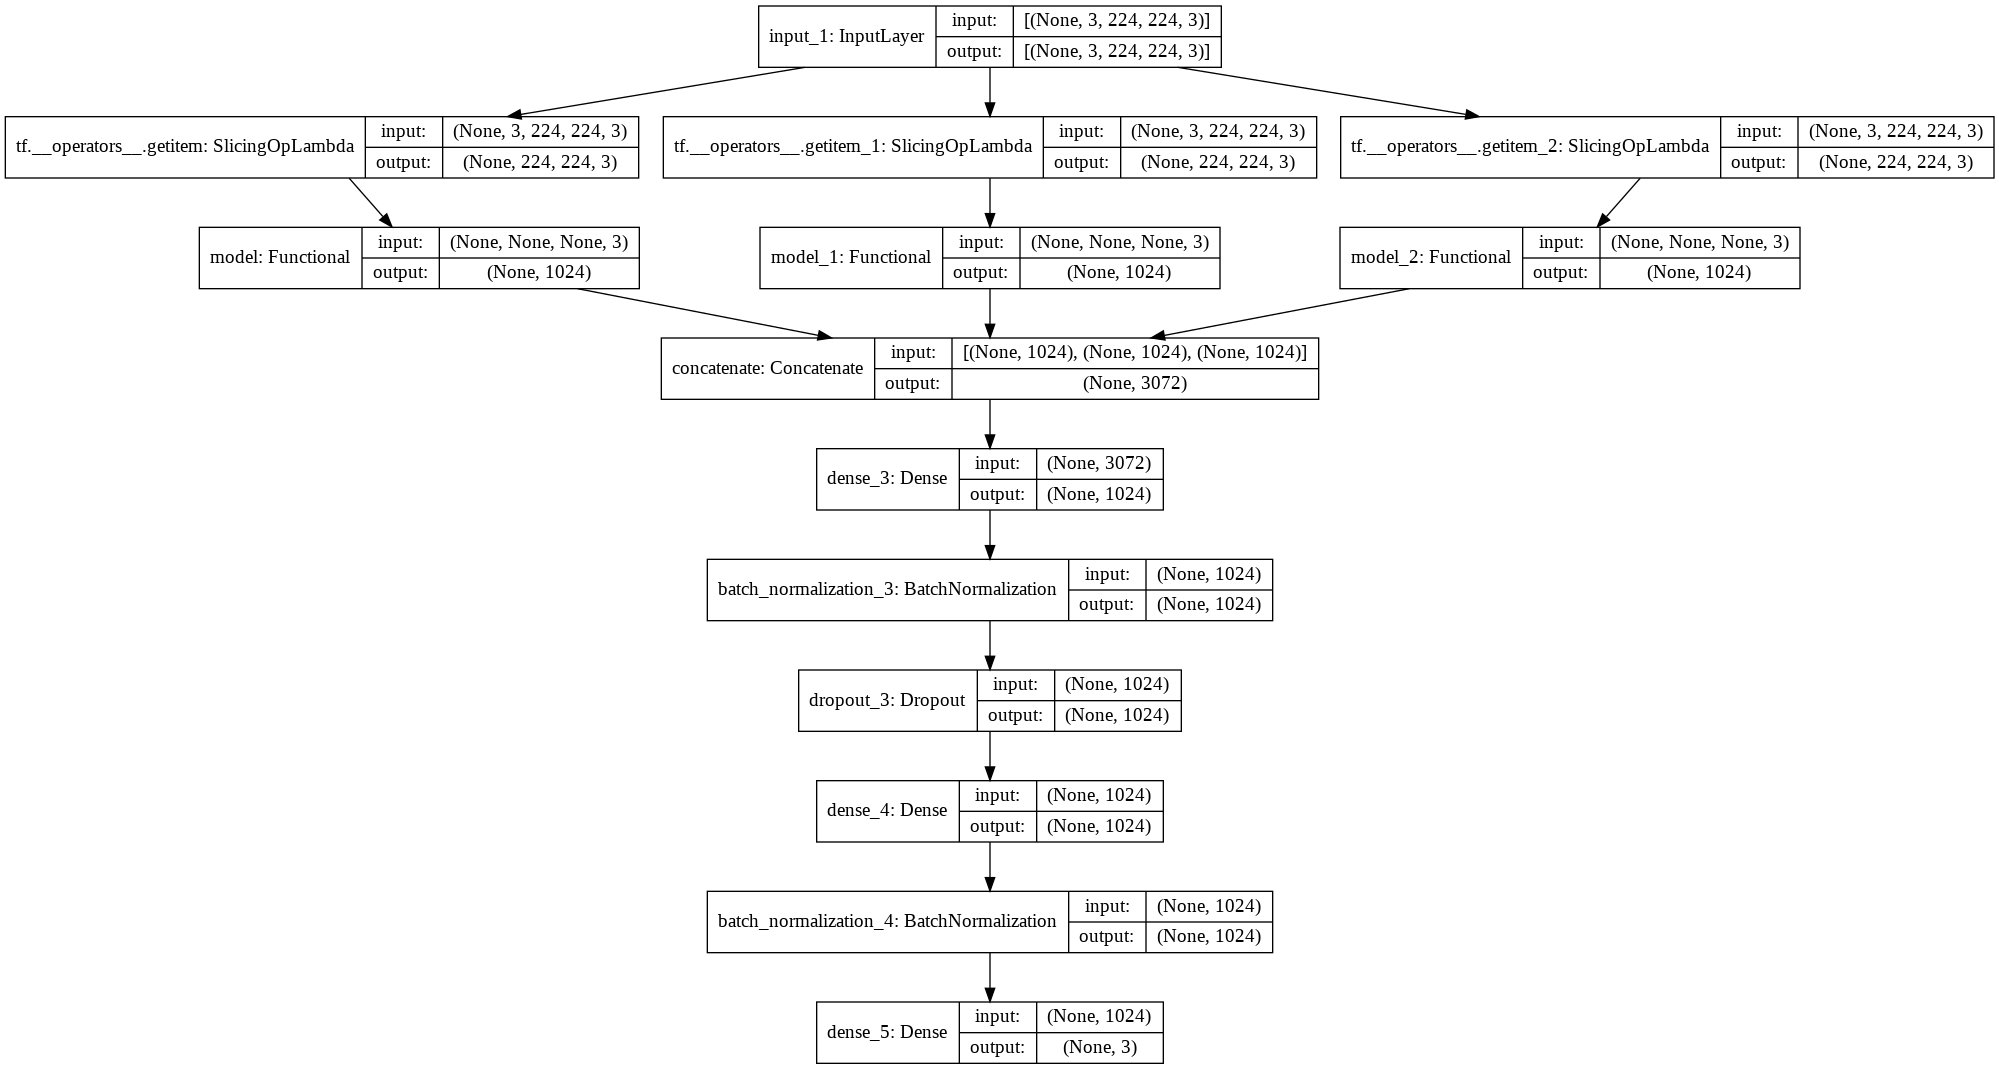

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer= 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 224, 224, 0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_2 (Sli (None, 224, 224, 3)  0           input_1[0][0]                    
____________________________________________________________________________________________

In [ ]:
#model.summary()

### Fine tuning train_mbrnv2

In [ ]:
max=2
for i in range(40):
  print("epoch {}/{}".format(i,40))
  
  train = model.fit(
      traingen,
      steps_per_epoch=len(traingen),
      epochs=1,
      
      verbose=1,
      )
  
  print("_______val_evaluate")
  vloss, vaccu= model.evaluate(valgen)
  if vloss < max:
      max = vloss
      model.save_weights("resnet50_epoch_{}_{}.h5".format( i, str(vaccu)[   :min(4,   len(str(vaccu))   )  ]  )   )     
      print("val_loss improve from {} => save epoch_{}".format(max,i))
  else:
      print("val_loss did not improve from {}".format(max))
  print()
  

epoch 0/40
30/30 [==============================] - 46s 271ms/step - loss: 2.1531 - accuracy: 0.4759
_______val_evaluate
9/9 [==============================] - 5s 327ms/step - loss: 2.6405 - accuracy: 0.3864
val_loss did not improve from 2

epoch 1/40
30/30 [==============================] - 8s 276ms/step - loss: 1.3047 - accuracy: 0.6771
_______val_evaluate
9/9 [==============================] - 2s 245ms/step - loss: 1.7782 - accuracy: 0.5076
val_loss improve from 1.7782026529312134 => save epoch_1

epoch 2/40
30/30 [==============================] - 8s 272ms/step - loss: 1.0479 - accuracy: 0.7421
_______val_evaluate
9/9 [==============================] - 2s 248ms/step - loss: 1.6468 - accuracy: 0.5909
val_loss improve from 1.646803617477417 => save epoch_2

epoch 3/40
30/30 [==============================] - 8s 275ms/step - loss: 0.6214 - accuracy: 0.8071
_______val_evaluate
9/9 [==============================] - 2s 245ms/step - loss: 1.1681 - accuracy: 0.6515
val_loss improve from 1

In [ ]:
model.evaluate(testgen)

5/5 [==============================] - 2s 347ms/step - loss: 1.2546 - accuracy: 0.6269


[1.2545706033706665, 0.6268656849861145]

In [ ]:
model.load_weights("/content/resnet50_epoch_28_0.72.h5")

In [ ]:
model.evaluate(testgen)

5/5 [==============================] - 1s 215ms/step - loss: 1.1285 - accuracy: 0.6269


[1.1284765005111694, 0.6268656849861145]

### Train All

In [ ]:
for i in range(4,7):
    for x in model.layers[i].layers[:-4]:
       x.trainable =True

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 224, 224, 0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_2 (Sli (None, 224, 224, 3)  0           input_1[0][0]                    
____________________________________________________________________________________________

In [ ]:

for i in range(50):
  print("epoch {}/{}".format(i,50))
  
  train = model.fit(
      traingen,
      steps_per_epoch=len(traingen),
      epochs=1,
      
      verbose=1,
      )
  
  print("_______val_evaluate")
  vloss, vaccu= model.evaluate(valgen)
  if vloss < max:
      max = vloss
      model.save_weights("mbrnv2_epoch_{}_{}.h5".format(i,str(vaccu)[:4]))
      print("val_loss improve from {} => save epoch_{}".format(max,i))
  else:
      print("val_loss did not improve from {}".format(vloss))
  print()
  

epoch 0/50
30/30 [==============================] - 8s 273ms/step - loss: 0.1284 - accuracy: 0.9560
_______val_evaluate
9/9 [==============================] - 2s 244ms/step - loss: 1.0302 - accuracy: 0.6818
val_loss did not improve from 1.0301979780197144

epoch 1/50
30/30 [==============================] - 8s 271ms/step - loss: 0.0722 - accuracy: 0.9769
_______val_evaluate
9/9 [==============================] - 2s 244ms/step - loss: 1.1038 - accuracy: 0.6818
val_loss did not improve from 1.103814721107483

epoch 2/50
30/30 [==============================] - 8s 270ms/step - loss: 0.0672 - accuracy: 0.9811
_______val_evaluate
9/9 [==============================] - 2s 243ms/step - loss: 1.3931 - accuracy: 0.6212
val_loss did not improve from 1.3931065797805786

epoch 3/50
30/30 [==============================] - 8s 270ms/step - loss: 0.1631 - accuracy: 0.9497
_______val_evaluate
9/9 [==============================] - 2s 242ms/step - loss: 1.1202 - accuracy: 0.6818
val_loss did not improv

# Metrics

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def visualize(evaluation):
  eva = [[],[],[],[],[],[]]
  i = 0
  for j in evaluation:
    if re.search('(.+?)s',j) and len(j) == 3:
      eva[i].append(int(j[0:2]))
      i = (i+1)%6
    else:
      try:
          eva[i].append(float(j))
          i = (i+1)%6
      except ValueError:
          pass

  f = plt.figure(figsize=(20,8))
  ax = f.add_subplot(121)
  ax2 = f.add_subplot(122)

  ax.plot(eva[1], label = "train_loss")
  ax.plot(eva[3],label = "val_loss")
  ax.set_title("Fine tuning's loss")
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss')
  ax.legend()

  ax2.plot(eva[2], label = "train_loss")
  ax2.plot(eva[4],label = "val_loss")
  ax2.set_title("Model's accuracy")
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()

  print('Mean time for train per epoch = ' + str(sum(eva[0])/len(eva[0])) + 's')

In [ ]:
def visualize_2(evaluation):
  eva = [[],[],[],[],[],[],[]]
  i = 0
  for j in evaluation:
    if j[-1]=='s':
      try:
        eva[i].append(int(j[:-1]))
        i = (i+1)%7
      except ValueError:
        pass
    else:
      try:
        eva[i].append(float(j))
        i = (i+1)%7
      except ValueError:
        pass

  f = plt.figure(figsize=(20,8))
  ax = f.add_subplot(121)
  ax2 = f.add_subplot(122)

  ax.plot(eva[1], label = "train_loss")
  ax.plot(eva[4],label = "val_loss")
  ax.set_title("Fine tuning's loss")
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss')
  ax.legend()

  ax2.plot(eva[2], label = "train_accuracy")
  ax2.plot(eva[5],label = "val_accuracy")
  ax2.set_title("Model's accuracy")
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()

  print('Mean time for train per epoch = ' + str(sum(eva[0])/len(eva[0])) + 's')
  print('Mean time for valid per epoch = ' + str(sum(eva[3])/len(eva[3])) + 's')

## Inception Resnet v2

### Fine tuning evaluate

Mean time for train per epoch = 29.0s


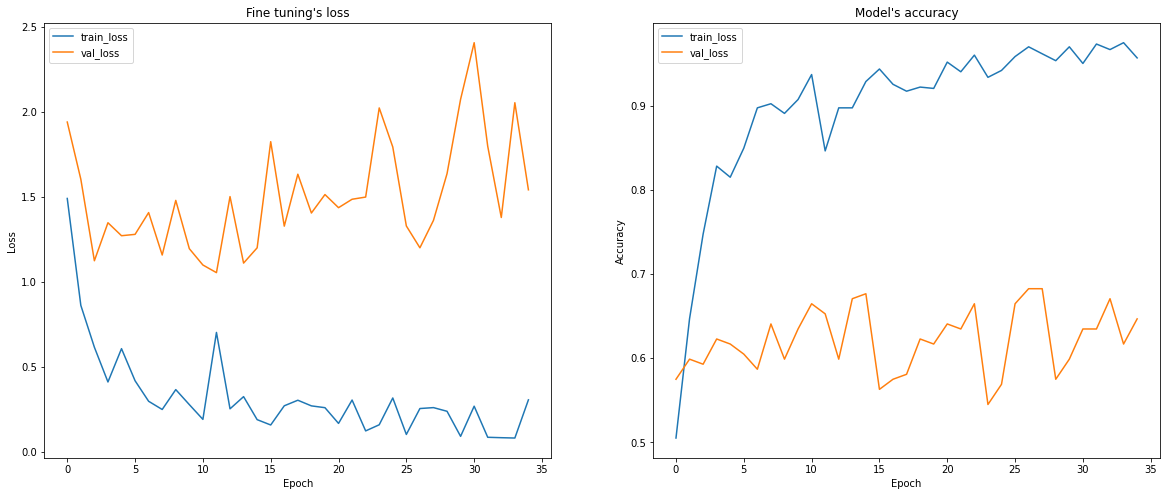

In [ ]:
visualize(Evaluate[0])

### Train All evaluate

Mean time for train per epoch = 26.78s


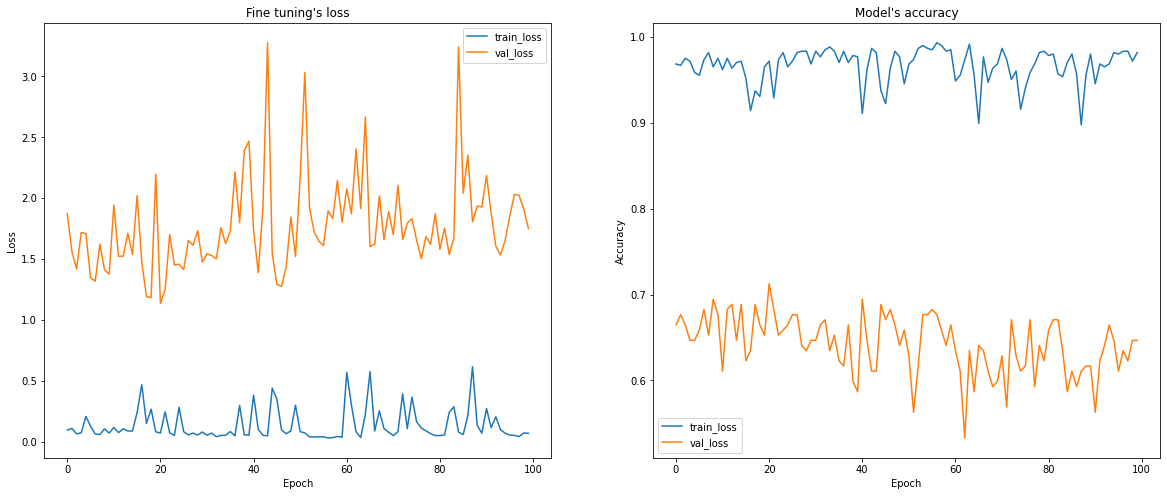

In [ ]:
visualize(Evaluate[1])

## ResNet50

### Fine tuning evaluate

Mean time for train per epoch = 17.03846153846154s
Mean time for valid per epoch = 2.0s


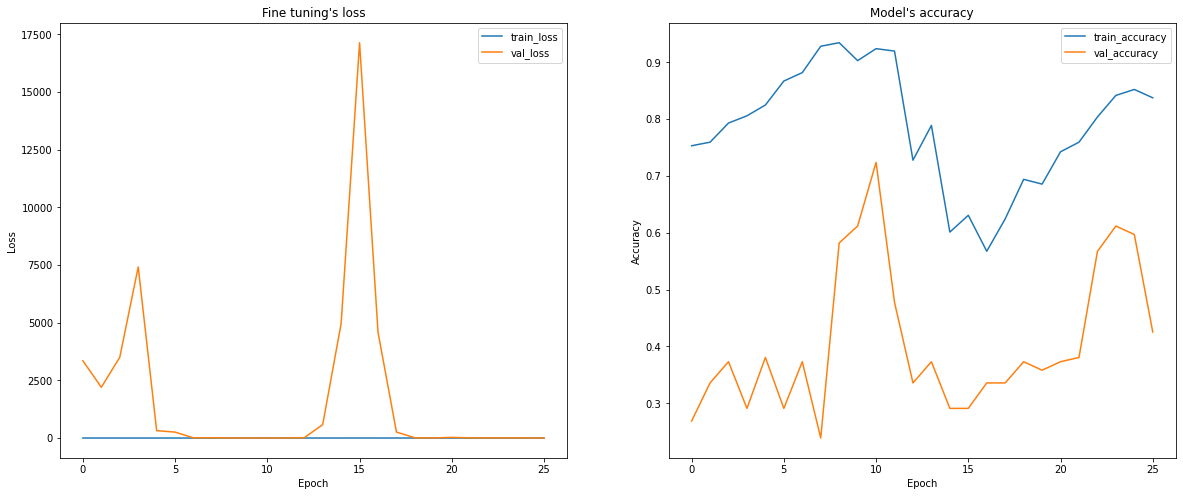

In [ ]:
visualize_2(Evaluate[2])

### Train All evaluate

Mean time for train per epoch = 17.0s
Mean time for valid per epoch = 2.0s


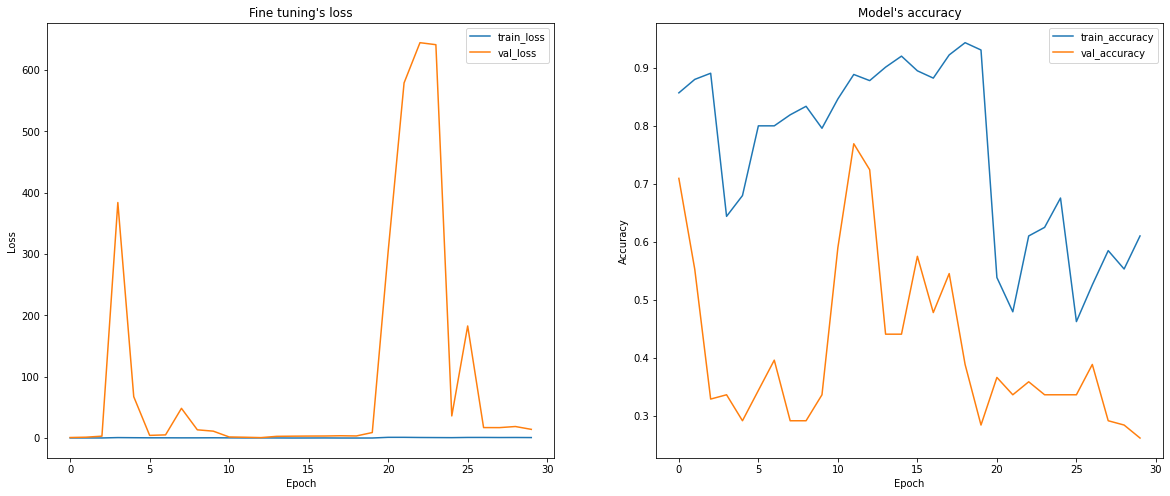

In [ ]:
visualize_2(Evaluate[3])

## MobileNetv2

### Fine tuning evaluate

Mean time for train per epoch = 8.95s
Mean time for valid per epoch = 2.075s


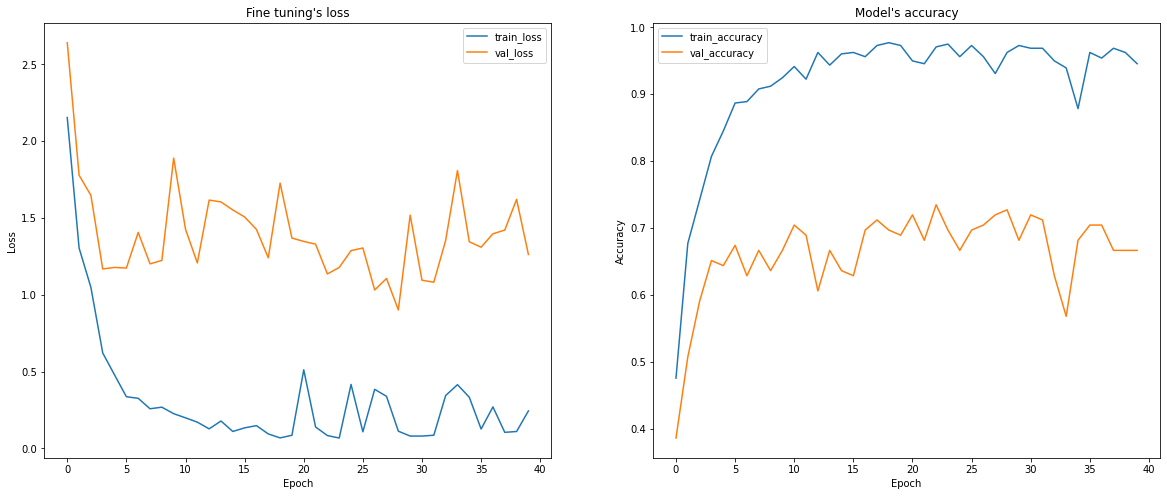

In [ ]:
visualize_2(Evaluate[4])

### Train All evaluate

Mean time for train per epoch = 8.0s
Mean time for valid per epoch = 2.0s


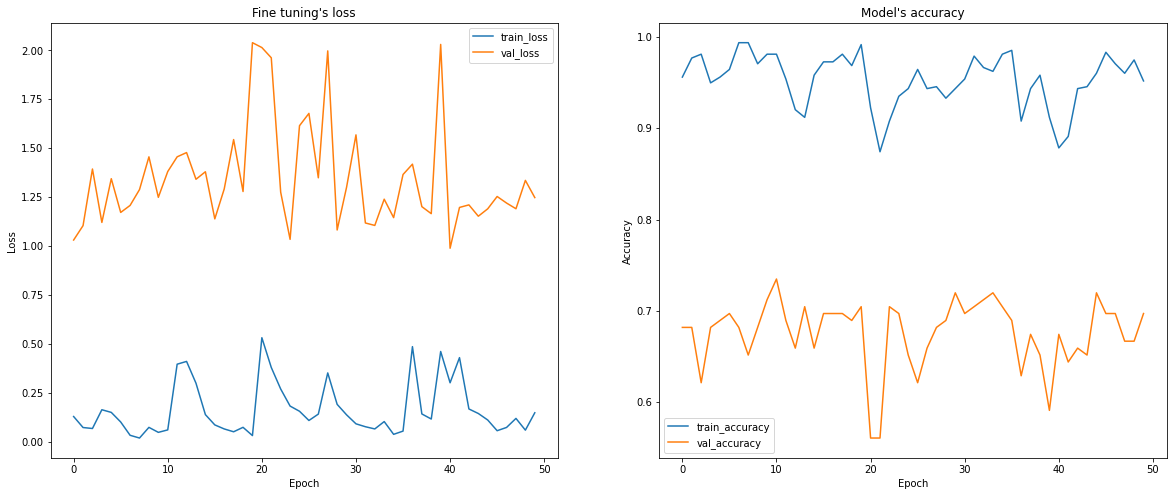

In [ ]:
visualize_2(Evaluate[5])